In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore') 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_excel("/content/drive/MyDrive/LCF_Internal/Renewable_Model/EDA Approach-1/XGBoost Implementation/logistic_v9/v9_data.xlsx", sheet_name = 'v9_orig')
data.head()

,OpportunityID,CreatedDate,FundedDate,OpportunityName,Priordeal_OppID,Renewal_PreviousCollectionStatus,Renewal_PreviousPace,Renewal_PreviousPaidPercentageOfRTR,Renewal_PreviousCreditScore,Renewal_CountPreviousDeals,...,Industry,Industry_Group__c,Avg_ReturnItemdays,LatestMonth_ReturnItemDays,PctChangeInReveune,PctAvgDailybalance2AvgMonthlyDeposits,TwoMonthAvg_AdjustedMonthlyDeposits,AdjustedMonthlyDeposits,drop_percent,Drop_category
0,0062M00000blHFEQA2,2018-12-03 22:40:43,2019-01-04,Orlando SeaWolves-New Deal-12032018,0064100000aUsacAAC,Other,100.0,0.30,572.0,1,...,Services,79 - Amusement and Recreation Services,0.0,1.0,NaN,0.200162,94586.515,108989.94,15.227783,Positive
1,0062M00000bmHA5QAM,2018-12-19 22:52:01,2019-01-14,Hafteh Bazaar Magazine-Renewal Deal-12192018,0064100000b8jUhAAI,Default,100.0,0.61,534.0,1,...,Manufacturing,"27 - Printing, Publishing, and Allied Industries",2.5,7.0,-0.120451,0.195928,-6656.000,18932.00,-384.435096,Negative
2,0062M00000bmhkAQAQ,2018-12-31 15:07:15,2019-01-03,Triple J Enterprises-Renewal Deal-12312018,0064100000b8R6zAAE,Other,100.0,0.55,537.0,1,...,Services,"75 - Automotive Repair, Services, and Parking",NaN,2.0,NaN,NaN,11706.000,10538.00,-9.977789,Negative
3,0062M00000bmKPLQA2,2018-12-20 18:06:27,2019-01-03,Elite Service Company-Renewal Deal-12202018,0064100000bAeaGAAS,Other,100.0,0.36,0.0,2,...,Construction,17 - Construction Special Trade Contractors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Neutral/Null
4,0062M00000bmlCWQAY,2019-01-02 15:32:18,2019-01-07,NU Signs-Renewal Deal-01022019,0064100000bAfpKAAS,Other,100.0,0.54,0.0,1,...,Manufacturing,39 - Miscellaneous Manufacturing Industries,0.0,NaN,-0.048373,0.248474,32275.135,27807.50,-13.842358,Negative


In [4]:
data.shape

(3140, 49)

In [5]:
data.isna().sum().sort_values(ascending = False)/len(data)*100

NetWO                                    74.171975
HBwoLCF                                  51.719745
Renewal_PreviousHBwoLCF                  38.662420
LatestMonth_ReturnItemDays               23.343949
LastBankStatement_OverdraftDays          14.522293
PctChangeInReveune                        4.936306
Renewal_PreviousAvgMonthRevenue           4.267516
Renewal_PreviousAvgDailyBalance           4.267516
Renewal_PreviousCreditScore               1.082803
drop_percent                              0.668790
TwoMonthAvg_AdjustedMonthlyDeposits       0.605096
BankStatement_Sum_NumReturnItems          0.573248
BankStatement_MA_NumReturnItems           0.573248
BankStatement_MA_OverdraftDays            0.573248
AvgDailybalance                           0.573248
AvgMonthlydeposits                        0.573248
Avg_ReturnItemdays                        0.573248
PctAvgDailybalance2AvgMonthlyDeposits     0.573248
Renewal_PreviousPaidPercentageOfRTR       0.382166
Renewal_PreviousPace           

In [7]:
data["NumberOfBankStatements"].value_counts()

4    1396
5    1133
3     560
2      30
0      18
1       3
Name: NumberOfBankStatements, dtype: int64

# Check Anomalies

1. Perform EDA
2. check wos - remove missing but give in excel sheet:
3. Specifically take care of no of bank statements and all other attributes related to it:
4. Check again the pace rates - {check for extreme weird values} - min_val_check
5. Check for anomalies - time in business -ve_values
6. is this business home based - flag based  -
7. take care of features to be dropped - take previous references
8. fill the missing values - so as to keep the progress alive: 
9. EDA is completed - save the file

In [ ]:
numerical_attributes = data.columns[data.dtypes!="object"]
categorical_attributes = data.columns[data.dtypes=="object"]
print("Numerical_attributes :", len(numerical_attributes), "\n")
print(numerical_attributes)
print('\n')
print("Categorical_attributes :", len(categorical_attributes), "\n")
print(categorical_attributes)

Numerical_attributes : 41 

Index(['CreatedDate', 'FundedDate', 'Renewal_PreviousPace',
       'Renewal_PreviousPaidPercentageOfRTR', 'Renewal_PreviousCreditScore',
       'Renewal_CountPreviousDeals', 'Renewal_PreviousCountBounces',
       'Renewal_PreviousPosition', 'Renewal_PreviousHBwLCF',
       'Renewal_PreviousHBwoLCF', 'Renewal_PreviousAvgMonthRevenue',
       'Renewal_PreviousAvgDailyBalance', 'Renewal_TwoWeekBounces',
       'NumberOfBankStatements', 'BankStatement_MA_OverdraftDays',
       'BankStatement_MA_NumReturnItems', 'BankStatement_Sum_NumReturnItems',
       'LastBankStatement_OverdraftDays', 'Credit_Score__c',
       'Time_in_Business__c', 'BBC_Position__c', 'HB_with_LCF_Payment__c',
       'HBwoLCF', 'Contract_HoldBack__c', 'AvgMonthlydeposits',
       'AvgDailybalance', 'FundedAmount', 'Paybackamount', 'NewDeal_YN',
       'ActiveDeal_YN', 'WriteOff_YN', 'FundedWriteOffAmount_Gross',
       'WOGross_AdvanceBalance', 'NetWO', 'Avg_ReturnItemdays',
       'LatestMon

# Dropped the unwanted features

In [ ]:
# Dropped unwanted features
data =  data.drop(['OpportunityName',
                   'Priordeal_OppID',
                   'CreatedDate',
                   'FundedDate', 
                   'Industry_Group__c',
                   'Renewal_PreviousCollectionStatus',
                   'ActiveDeal_YN',
                   'NewDeal_YN',
                   'Renewal_PreviousCreditScore',
                   'BankStatement_Sum_NumReturnItems',
                   'LastBankStatement_OverdraftDays',
                   'HBwoLCF',
                   'Contract_HoldBack__c',
                   'Renewal_PreviousHBwoLCF',
                   'NetWO'], axis=1)

In [ ]:
data.shape

(3140, 34)

In [ ]:
numerical_attributes = data.columns[data.dtypes!="object"]
categorical_attributes = data.columns[data.dtypes=="object"]
print("Numerical_attributes :", len(numerical_attributes), "\n")
print(numerical_attributes)
print('\n')
print("Categorical_attributes :", len(categorical_attributes), "\n")
print(categorical_attributes)

Numerical_attributes : 30 

Index(['Renewal_PreviousPace', 'Renewal_PreviousPaidPercentageOfRTR',
       'Renewal_CountPreviousDeals', 'Renewal_PreviousCountBounces',
       'Renewal_PreviousPosition', 'Renewal_PreviousHBwLCF',
       'Renewal_PreviousAvgMonthRevenue', 'Renewal_PreviousAvgDailyBalance',
       'Renewal_TwoWeekBounces', 'NumberOfBankStatements',
       'BankStatement_MA_OverdraftDays', 'BankStatement_MA_NumReturnItems',
       'Credit_Score__c', 'Time_in_Business__c', 'BBC_Position__c',
       'HB_with_LCF_Payment__c', 'AvgMonthlydeposits', 'AvgDailybalance',
       'FundedAmount', 'Paybackamount', 'WriteOff_YN',
       'FundedWriteOffAmount_Gross', 'WOGross_AdvanceBalance',
       'Avg_ReturnItemdays', 'LatestMonth_ReturnItemDays',
       'PctChangeInReveune', 'PctAvgDailybalance2AvgMonthlyDeposits',
       'TwoMonthAvg_AdjustedMonthlyDeposits', 'AdjustedMonthlyDeposits',
       'drop_percent'],
      dtype='object')


Categorical_attributes : 4 

Index(['OpportunityID

###  Observations

* Some attributes name updated, like -
   - FundedWriteOffAmount_Net = NetWO
   - AvgMonthRevenue = AvgMonthlydeposits                        
   - AvgDailyBalance = AvgDailybalance
   - Avg_ReturnItemsDays = Avg_ReturnItemdays                        
   - Pct change in Month Revenue = PctChangeInReveune
   - PctAvgDailybalance2AvgMonthlyRevenue = PctAvgDailybalance2AvgMonthlyDeposits     


* check - WriteOff_YN = should not be any missing values 
* Is_this_Business_home_based__c = Categorical to Numerical 
* Renewal_PreviousPace = remove anomoloies < 50% values 
* Time_in_Business__c = check and drop negative values  

### New added columns for decile analysis
* Paybackamount
* WOGross_AdvanceBalance

In [ ]:
# check %_of_missing_values
data.isnull().sum().sort_values(ascending = False)/len(data)*100

LatestMonth_ReturnItemDays               23.343949
PctChangeInReveune                        4.936306
Renewal_PreviousAvgMonthRevenue           4.267516
Renewal_PreviousAvgDailyBalance           4.267516
drop_percent                              0.668790
TwoMonthAvg_AdjustedMonthlyDeposits       0.605096
AvgDailybalance                           0.573248
Avg_ReturnItemdays                        0.573248
BankStatement_MA_NumReturnItems           0.573248
BankStatement_MA_OverdraftDays            0.573248
AvgMonthlydeposits                        0.573248
PctAvgDailybalance2AvgMonthlyDeposits     0.573248
Credit_Score__c                           0.382166
Renewal_PreviousPaidPercentageOfRTR       0.382166
Renewal_PreviousPace                      0.382166
AdjustedMonthlyDeposits                   0.222930
Paybackamount                             0.063694
FundedAmount                              0.063694
WriteOff_YN                               0.063694
WOGross_AdvanceBalance         

In [ ]:
# with pd.ExcelWriter('/content/drive/MyDrive/missing_values_v7_train_data.xlsx') as writer:
#   data[data['PctChangeInReveune'].isna()].to_excel(writer, sheet_name = 'PctChangeInReveune')
#   data[data['LatestMonth_ReturnItemDays'].isna()].to_excel(writer, sheet_name = 'LatestMonth_ReturnItemDays')
#   data[data['Renewal_PreviousPaidPercentageOfRTR'].isna()].to_excel(writer, sheet_name = 'Renewal_PreviousPaidPercentageOfRTR')
#   data[data['Renewal_PreviousAvgMonthRevenue'].isna()].to_excel(writer, sheet_name = 'Renewal_PreviousAvgMonthRevenue')
#   data[data['PctAvgDailybalance2AvgMonthlyDeposits'].isna()].to_excel(writer, sheet_name = 'PctAvgDailybalance2AvgMonthlyDeposits')
#   data[data['AvgMonthlydeposits'].isna()].to_excel(writer, sheet_name = 'AvgMonthlydeposits')
#   data[data['Renewal_PreviousAvgDailyBalance'].isna()].to_excel(writer, sheet_name = 'Renewal_PreviousAvgDailyBalance')
#   data[data['AvgDailybalance'].isna()].to_excel(writer, sheet_name = 'AvgDailybalance')
#   data[data['Avg_ReturnItemdays'].isna()].to_excel(writer, sheet_name = 'Avg_ReturnItemdays')
#   data[data['BankStatement_MA_OverdraftDays'].isna()].to_excel(writer, sheet_name = 'BankStatement_MA_OverdraftDays')
#   data[data['BankStatement_MA_NumReturnItems'].isna()].to_excel(writer, sheet_name = 'BankStatement_MA_NumReturnItems')
#   data[data['Credit_Score__c'].isna()].to_excel(writer, sheet_name = 'Credit_Score__c')
#   data[data['Renewal_PreviousPace'].isna()].to_excel(writer, sheet_name = 'Renewal_PreviousPace')

In [ ]:
data.corr()['WriteOff_YN'].sort_values()

NumberOfBankStatements                  -0.224129
Time_in_Business__c                     -0.108304
Renewal_PreviousPaidPercentageOfRTR     -0.094769
Renewal_CountPreviousDeals              -0.082629
Credit_Score__c                         -0.059046
HB_with_LCF_Payment__c                  -0.020895
LatestMonth_ReturnItemDays              -0.017351
BankStatement_MA_NumReturnItems         -0.015051
Renewal_PreviousHBwLCF                  -0.014950
PctAvgDailybalance2AvgMonthlyDeposits   -0.014069
AdjustedMonthlyDeposits                 -0.013550
drop_percent                            -0.006126
Renewal_PreviousPosition                 0.001106
TwoMonthAvg_AdjustedMonthlyDeposits      0.001509
Renewal_PreviousPace                     0.003857
AvgMonthlydeposits                       0.008641
AvgDailybalance                          0.009219
Avg_ReturnItemdays                       0.011985
BBC_Position__c                          0.012788
PctChangeInReveune                       0.013107


# Tasks to do -

* EDA - 
* -ves, replace it by 0    - WOGross_AdvanceBalance - **Done**
* 1 outlier - remove it - **Done**
* Pace rate - drop it <50%   - Renewal_PreviousPace - **Done**
* check for sir answer - **Done**
* decile analysis on and train data both 
* Contact us - to discuss hyper-parameter tuning

# WriteOff_YN

In [ ]:
data['WriteOff_YN'].value_counts()

0.0    2327
1.0     811
Name: WriteOff_YN, dtype: int64

In [ ]:
data['WriteOff_YN'].isna().sum()

2

In [ ]:
data[data['WriteOff_YN'].isna()]['WriteOff_YN']

3138   NaN
3139   NaN
Name: WriteOff_YN, dtype: float64

In [ ]:
data.drop(index=[3138, 3139], inplace = True)

In [ ]:
data['WriteOff_YN'].isna().sum()

0

In [ ]:
# check for %_skewness
print("Percenatge of Non_writeoff_deal: ", round(data['WriteOff_YN'].value_counts()[0]/len(data['WriteOff_YN'])*100), "%")
print("Percenatge of writeoff_deal: ", round(data['WriteOff_YN'].value_counts()[1]/len(data['WriteOff_YN'])*100), "%")

Percenatge of Non_writeoff_deal:  74 %
Percenatge of writeoff_deal:  26 %


In [ ]:
## Dealing with the categorical attributes - converting them with one hot encoding methods

#### Is_this_Business_home_based__c
#### Industry
#### Drop_category 

In [ ]:
data = pd.get_dummies(data, columns = ['Is_this_Business_home_based__c'],drop_first= True)
data = pd.get_dummies(data, columns = ["Industry"], drop_first = True)
data = pd.get_dummies(data, columns = ["Drop_category"], drop_first = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3138 entries, 0 to 3137
Data columns (total 44 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   OpportunityID                               3138 non-null   object 
 1   Renewal_PreviousPace                        3126 non-null   float64
 2   Renewal_PreviousPaidPercentageOfRTR         3126 non-null   float64
 3   Renewal_CountPreviousDeals                  3138 non-null   int64  
 4   Renewal_PreviousCountBounces                3138 non-null   int64  
 5   Renewal_PreviousPosition                    3138 non-null   int64  
 6   Renewal_PreviousHBwLCF                      3138 non-null   float64
 7   Renewal_PreviousAvgMonthRevenue             3004 non-null   float64
 8   Renewal_PreviousAvgDailyBalance             3004 non-null   float64
 9   Renewal_TwoWeekBounces                      3138 non-null   int64  
 10  NumberOfBank

# Renewal_PreviousPace

In [ ]:
data[data['Renewal_PreviousPace'].isna()]['Renewal_PreviousPace'] #fill this up

44     NaN
289    NaN
290    NaN
426    NaN
506    NaN
632    NaN
737    NaN
1005   NaN
1427   NaN
1624   NaN
1838   NaN
2190   NaN
Name: Renewal_PreviousPace, dtype: float64

In [ ]:
data[data['Renewal_PreviousPace'] < 30][['Renewal_PreviousPace',"WriteOff_YN", "OpportunityID"]]

,Renewal_PreviousPace,WriteOff_YN,OpportunityID
1515,19.93,0.0,0062M00000lUkcxQAC
2136,20.00,1.0,0062M00000mTGVnQAO
2158,13.10,0.0,0062M00000mTWDDQA4
2493,11.54,0.0,0062M00000naBMrQAM


In [ ]:
data.drop(index=[1515,2136,2158,2493], inplace = True)

In [ ]:
data[data['Renewal_PreviousPace'] < 30]['Renewal_PreviousPace']

Series([], Name: Renewal_PreviousPace, dtype: float64)

In [ ]:
# data[data['Renewal_PreviousPace'] < 50][['Renewal_PreviousPace', 'OpportunityID']].to_excel('/content/drive/MyDrive/anomalies_pace_rate.xlsx', index = True)

#### Time_in_Business__c - cheking -ve values

In [ ]:
data[data["Time_in_Business__c"]<0]["Time_in_Business__c"]

Series([], Name: Time_in_Business__c, dtype: float64)

In [ ]:
#data["Time_in_Business__c"] = data["Time_in_Business__c"].replace([-0.52,-0.85, -0.12, -1.07, -0.91, -0.72, -0.08, -0.06, -0.65, -0.37, -0.24], data["Time_in_Business__c"].median())

#### WOGross_AdvanceBalance


1.   Look for -ve values and replace them with zero

In [ ]:
data['WOGross_AdvanceBalance'].describe()

count      3134.000000
mean       5078.713902
std       24381.380035
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      526048.400000
Name: WOGross_AdvanceBalance, dtype: float64

In [ ]:
data[data['WOGross_AdvanceBalance'] > 0]['WOGross_AdvanceBalance']

2        4376.00
3       22088.00
4       15777.00
5        4920.00
6        5115.00
          ...   
3123     9660.04
3126     6896.61
3130    20544.41
3133     8312.08
3134    93566.65
Name: WOGross_AdvanceBalance, Length: 777, dtype: float64

In [ ]:
data[(data['WOGross_AdvanceBalance'] < 0) & data['WriteOff_YN'] == 1][['WOGross_AdvanceBalance', 'WriteOff_YN']][:10]

,WOGross_AdvanceBalance,WriteOff_YN


In [ ]:
# Thesre are technically the anomalies - need to treat them differently at the decile time 
data[(data['WOGross_AdvanceBalance'] == 0) & data['WriteOff_YN'] == 1][['WOGross_AdvanceBalance', 'FundedWriteOffAmount_Gross', 'WriteOff_YN']]

,WOGross_AdvanceBalance,FundedWriteOffAmount_Gross,WriteOff_YN
177,0.0,0.0,1.0
178,0.0,0.0,1.0
240,0.0,0.0,1.0
353,0.0,0.0,1.0
537,0.0,0.0,1.0
686,0.0,0.0,1.0
743,0.0,0.0,1.0
764,0.0,0.0,1.0
926,0.0,0.0,1.0
1070,0.0,0.0,1.0


In [ ]:
len(data[(data['WOGross_AdvanceBalance'] == 0) & data['WriteOff_YN'] == 1][['WOGross_AdvanceBalance', 'WriteOff_YN']])

33

In [ ]:
data[data['WOGross_AdvanceBalance'] < 0]['WOGross_AdvanceBalance']

Series([], Name: WOGross_AdvanceBalance, dtype: float64)

In [ ]:
data[data['WOGross_AdvanceBalance'] < 0]['WriteOff_YN'].value_counts()

Series([], Name: WriteOff_YN, dtype: int64)

In [ ]:
data[(data['WOGross_AdvanceBalance'] > 0) & data['WriteOff_YN'] == 1][['WOGross_AdvanceBalance', 'WriteOff_YN']]

,WOGross_AdvanceBalance,WriteOff_YN
2,4376.00,1.0
3,22088.00,1.0
4,15777.00,1.0
5,4920.00,1.0
6,5115.00,1.0
...,...,...
3123,9660.04,1.0
3126,6896.61,1.0
3130,20544.41,1.0
3133,8312.08,1.0


In [ ]:
data[data["WOGross_AdvanceBalance"] > 0]["WriteOff_YN"].value_counts()

1.0    777
Name: WriteOff_YN, dtype: int64

In [ ]:
# replacing -ve values with zeros
# data['WOGross_AdvanceBalance'] = data['WOGross_AdvanceBalance'].apply(lambda x: 0 if x < 0 else x)

In [ ]:
data[data['WOGross_AdvanceBalance'] == 0]['WriteOff_YN'].value_counts()

0.0    2324
1.0      33
Name: WriteOff_YN, dtype: int64

In [ ]:
'''
funded_amount = $1000
payback_amount = $1500
collected_amount = $800 || $1200 || $1500 (extra $200)
adv_wos_$ (opp_1) = $1500 - $800 = $700
adv_wos_$ (opp_1) = $1500 - $1200 = $300
adv_wos_$ (opp_1) = $1500 - ($1500 + $200) = -$200
'''


In [ ]:
data[(data['WOGross_AdvanceBalance'] == 0) & (data['WriteOff_YN'] == 1)][["OpportunityID", "WOGross_AdvanceBalance", "WriteOff_YN"]]

,OpportunityID,WOGross_AdvanceBalance,WriteOff_YN
177,0062M00000dkhrMQAQ,0.0,1.0
178,0062M00000dkkW6QAI,0.0,1.0
240,0062M00000eQ4hQQAS,0.0,1.0
353,0062M00000gaJ35QAE,0.0,1.0
537,0062M00000iaYtqQAE,0.0,1.0
686,0062M00000iR1KaQAK,0.0,1.0
743,0062M00000isXVRQA2,0.0,1.0
764,0062M00000itIDEQA2,0.0,1.0
926,0062M00000jxz1WQAQ,0.0,1.0
1070,0062M00000kxpbRQAQ,0.0,1.0


In [ ]:
#data[(data['WOGross_AdvanceBalance'] == 0) & (data['WriteOff_YN'] == 1)][["OpportunityID", "WOGross_AdvanceBalance", "WriteOff_YN"]].index

In [ ]:
'''
data.drop(index= [38,  163,  208,  274,  803,  814,  822,  892,  949, 1310, 1422,
            1493, 1503, 1561, 1675, 1745, 2242, 2353, 2356, 2378, 2408, 2436,
            2481, 2490, 2534, 2639, 2682, 2706, 2740, 2779, 2911, 2986, 3135], inplace = True)
'''

#### BBC_Position__C

In [ ]:
data['BBC_Position__c']

0       3
1       1
2       2
3       1
4       2
       ..
3133    1
3134    1
3135    4
3136    1
3137    1
Name: BBC_Position__c, Length: 3134, dtype: int64

In [ ]:
data['BBC_Position__c'].value_counts()

1     1539
2      841
3      403
4      222
5       64
6       35
7        9
8        5
10       5
9        4
13       2
11       2
33       1
20       1
15       1
Name: BBC_Position__c, dtype: int64

In [ ]:
data['BBC_Position__c'].describe()

count    3134.000000
mean        1.963306
std         1.466813
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max        33.000000
Name: BBC_Position__c, dtype: float64

In [ ]:
data['BBC_Position__c'].isna().sum()

0

In [ ]:
data[data['BBC_Position__c'] < 0]['BBC_Position__c']


Series([], Name: BBC_Position__c, dtype: int64)

# NumberOfBankStatements                    

In [ ]:
# Related attributes -

# AvgMonthRevenue - column name updated
# Renewal_PreviousAvgMonthRevenue
# AvgDailyBalance - column name updated
# Renewal_PreviousAvgDailyBalance
# BankStatement_MA_OverdraftDays
# BankStatement_MA_NumReturnItems
# Avg_ReturnItemsDays - column name updated
# Pct change in Month Revenue  - column name updated
# PctAvgDailybalance2AvgMonthlyRevenue - column name updated
# LastBankStatement_OverdraftDays - dropped
# BankStatement_Sum_NumReturnItems - dropped


In [ ]:
data.columns

Index(['OpportunityID', 'Renewal_PreviousPace',
       'Renewal_PreviousPaidPercentageOfRTR', 'Renewal_CountPreviousDeals',
       'Renewal_PreviousCountBounces', 'Renewal_PreviousPosition',
       'Renewal_PreviousHBwLCF', 'Renewal_PreviousAvgMonthRevenue',
       'Renewal_PreviousAvgDailyBalance', 'Renewal_TwoWeekBounces',
       'NumberOfBankStatements', 'BankStatement_MA_OverdraftDays',
       'BankStatement_MA_NumReturnItems', 'Credit_Score__c',
       'Time_in_Business__c', 'BBC_Position__c', 'HB_with_LCF_Payment__c',
       'AvgMonthlydeposits', 'AvgDailybalance', 'FundedAmount',
       'Paybackamount', 'WriteOff_YN', 'FundedWriteOffAmount_Gross',
       'WOGross_AdvanceBalance', 'Avg_ReturnItemdays',
       'LatestMonth_ReturnItemDays', 'PctChangeInReveune',
       'PctAvgDailybalance2AvgMonthlyDeposits',
       'TwoMonthAvg_AdjustedMonthlyDeposits', 'AdjustedMonthlyDeposits',
       'drop_percent', 'Is_this_Business_home_based__c_Yes',
       'Industry_Construction', 'Industry

In [ ]:
print('Checking Missing Values -')
print('\n')
print('NumberOfBankStatements :', data['NumberOfBankStatements'].isna().sum())
print('AvgMonthlydeposits :' ,data['AvgMonthlydeposits'].isna().sum())          
print('AvgDailybalance :' ,data['AvgDailybalance'].isna().sum())
print('BankStatement_MA_NumReturnItems :', data['BankStatement_MA_NumReturnItems'].isna().sum())
print('BankStatement_MA_OverdraftDays :' ,data['BankStatement_MA_OverdraftDays'].isna().sum())

Checking Missing Values -


NumberOfBankStatements : 0
AvgMonthlydeposits : 18
AvgDailybalance : 18
BankStatement_MA_NumReturnItems : 18
BankStatement_MA_OverdraftDays : 18


In [ ]:
def attribute_info(df_feature):
  print('Description of attribute :', '\n' )
  print(df_feature.describe(), '\n')
  print('Value counts of attribute :', '\n' )
  print(df_feature.value_counts(), '\n')
  print('Unique number of attribute :', '\n' )
  print(df_feature.unique(), '\n')
  print('Missing values in attribute :', '\n' )
  print(df_feature.isna().sum(), '\n')
  print('Missing values in attribute_% :', '\n' )
  print(df_feature.isna().sum()/len(df_feature)*100, '\n')
  plt.figure(figsize=(20,10))
  plt.subplot(2,2,1)
  sns.distplot(df_feature)
  plt.subplot(2,2,2)
  sns.boxplot(df_feature)
  plt.show()

In [ ]:
data.isnull().sum().sort_values(ascending = False)/len(data)*100

LatestMonth_ReturnItemDays                    23.388641
PctChangeInReveune                             4.913848
Renewal_PreviousAvgDailyBalance                4.243778
Renewal_PreviousAvgMonthRevenue                4.243778
drop_percent                                   0.670070
TwoMonthAvg_AdjustedMonthlyDeposits            0.606254
Avg_ReturnItemdays                             0.574346
PctAvgDailybalance2AvgMonthlyDeposits          0.574346
BankStatement_MA_OverdraftDays                 0.574346
BankStatement_MA_NumReturnItems                0.574346
AvgMonthlydeposits                             0.574346
AvgDailybalance                                0.574346
Renewal_PreviousPaidPercentageOfRTR            0.382897
Renewal_PreviousPace                           0.382897
Credit_Score__c                                0.382897
AdjustedMonthlyDeposits                        0.223357
Industry_E-Commerce                            0.000000
Is_this_Business_home_based__c_Yes             0

attribute_name : LatestMonth_ReturnItemDays
Description of attribute : 

count    2401.00000
mean        1.41566
std         3.18716
min         0.00000
25%         0.00000
50%         0.00000
75%         1.00000
max        22.00000
Name: LatestMonth_ReturnItemDays, dtype: float64 

Value counts of attribute : 

0.0     1640
1.0      197
2.0      137
3.0      116
4.0       58
5.0       45
6.0       42
7.0       30
8.0       28
12.0      21
9.0       17
14.0      14
11.0      13
19.0       8
10.0       8
13.0       7
22.0       6
15.0       3
16.0       3
18.0       3
17.0       3
20.0       2
Name: LatestMonth_ReturnItemDays, dtype: int64 

Unique number of attribute : 

[ 1.  7.  2. nan  0.  4.  6.  5.  3. 10. 12. 18. 22. 11. 14.  9.  8. 16.
 15. 19. 13. 17. 20.] 

Missing values in attribute : 

733 

Missing values in attribute_% : 

23.388640714741545 



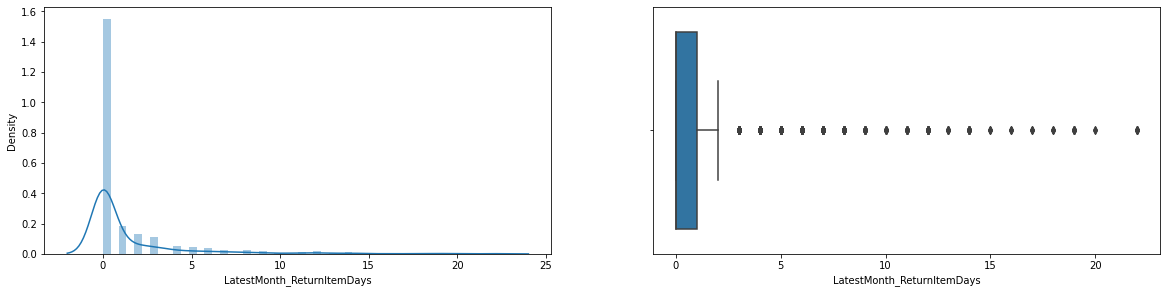

attribute_name : PctChangeInReveune
Description of attribute : 

count    2980.000000
mean       -0.141482
std         6.329788
min      -337.517455
25%        -0.049709
50%         0.051045
75%         0.194526
max         0.996664
Name: PctChangeInReveune, dtype: float64 

Value counts of attribute : 

 0.000000    176
-0.120451      1
 0.137381      1
 0.037989      1
 0.713757      1
            ... 
 0.462938      1
 0.212062      1
 0.173686      1
 0.150688      1
 0.057467      1
Name: PctChangeInReveune, Length: 2805, dtype: int64 

Unique number of attribute : 

[        nan -0.12045081 -0.04837341 ... -0.01569161  0.25665152
  0.05746664] 

Missing values in attribute : 

154 

Missing values in attribute_% : 

4.913848117421825 



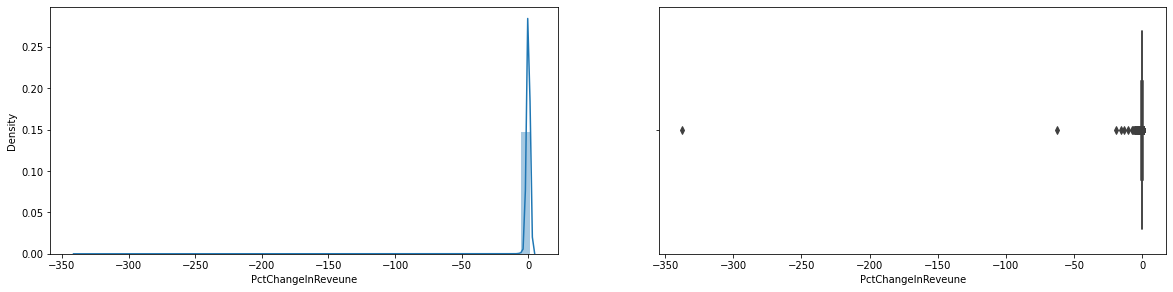

attribute_name : Renewal_PreviousAvgMonthRevenue
Description of attribute : 

count    3.001000e+03
mean     6.607614e+04
std      2.414144e+05
min      1.002600e+02
25%      1.509289e+04
50%      2.555369e+04
75%      5.370564e+04
max      9.840592e+06
Name: Renewal_PreviousAvgMonthRevenue, dtype: float64 

Value counts of attribute : 

76123.78     2
27440.33     2
36480.22     2
10451.05     2
46248.83     2
            ..
61989.94     1
5896.19      1
18245.40     1
144146.67    1
99392.16     1
Name: Renewal_PreviousAvgMonthRevenue, Length: 2955, dtype: int64 

Unique number of attribute : 

[     nan 22265.24 32275.14 ... 28034.48 62318.62 99392.16] 

Missing values in attribute : 

133 

Missing values in attribute_% : 

4.243777919591577 



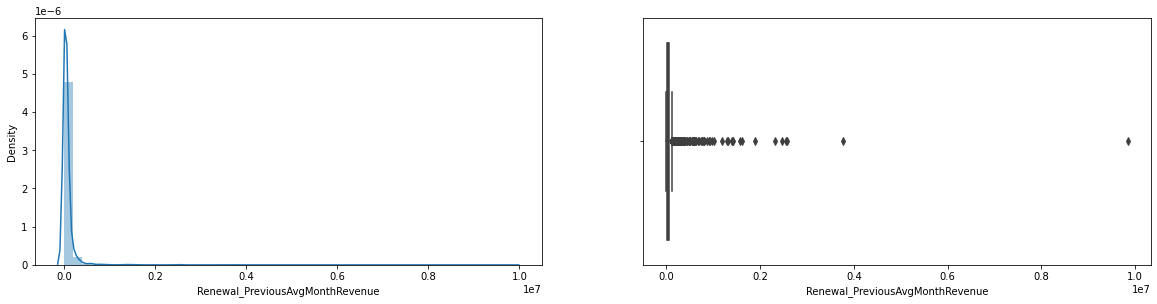

attribute_name : Renewal_PreviousAvgDailyBalance
Description of attribute : 

count    3.001000e+03
mean     1.080792e+04
std      5.250809e+04
min     -1.447103e+05
25%      1.714480e+03
50%      3.535520e+03
75%      7.940400e+03
max      2.450719e+06
Name: Renewal_PreviousAvgDailyBalance, dtype: float64 

Value counts of attribute : 

25749.86     2
5625.90      2
202615.38    2
4403.00      2
3641.16      2
            ..
635893.84    1
11329.56     1
2405.13      1
2218.07      1
6214.83      1
Name: Renewal_PreviousAvgDailyBalance, Length: 2949, dtype: int64 

Unique number of attribute : 

[    nan 4292.88 8270.4  ... 2730.79 3442.59 6214.83] 

Missing values in attribute : 

133 

Missing values in attribute_% : 

4.243777919591577 



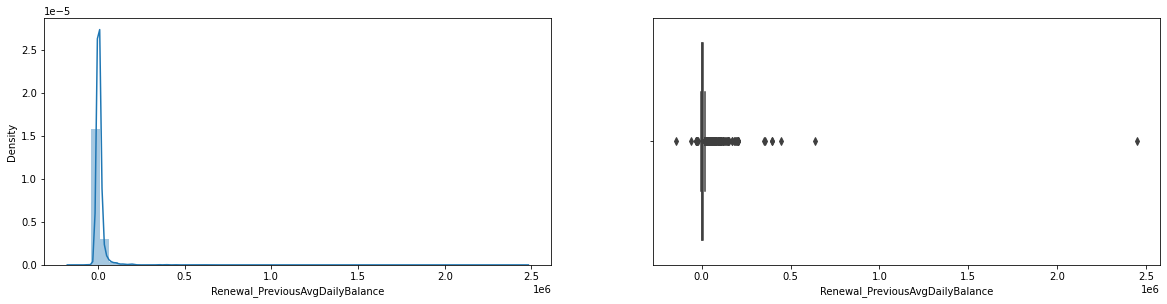

attribute_name : PctAvgDailybalance2AvgMonthlyDeposits
Description of attribute : 

count    3116.000000
mean        0.242363
std         2.626361
min        -0.206114
25%         0.066209
50%         0.122357
75%         0.219150
max       145.707261
Name: PctAvgDailybalance2AvgMonthlyDeposits, dtype: float64 

Value counts of attribute : 

0.051475    2
0.083351    2
0.018218    2
0.126255    2
0.132618    2
           ..
0.079909    1
0.530191    1
0.068513    1
0.164175    1
0.026161    1
Name: PctAvgDailybalance2AvgMonthlyDeposits, Length: 3084, dtype: int64 

Unique number of attribute : 

[0.20016183 0.19592757        nan ... 0.08495303 0.07000895 0.02616116] 

Missing values in attribute : 

18 

Missing values in attribute_% : 

0.574345883854499 



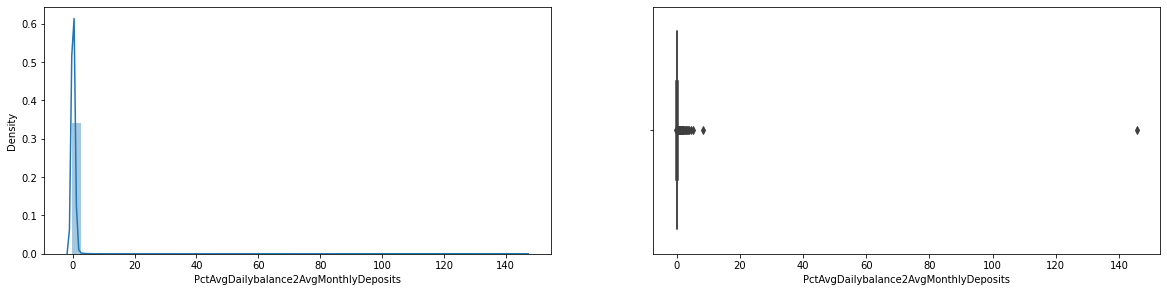

attribute_name : Avg_ReturnItemdays
Description of attribute : 

count    3116.000000
mean        0.882857
std         1.894860
min         0.000000
25%         0.000000
50%         0.000000
75%         0.800000
max        19.000000
Name: Avg_ReturnItemdays, dtype: float64 

Value counts of attribute : 

0.000000     1692
0.250000      140
0.200000      134
1.000000      104
0.500000       96
             ... 
12.333333       1
9.250000        1
9.333333        1
8.500000        1
16.250000       1
Name: Avg_ReturnItemdays, Length: 106, dtype: int64 

Unique number of attribute : 

[ 0.        2.5            nan  2.        4.        4.25      1.
  0.333333  0.25      1.666666  6.666666  1.25      0.666666  7.
 13.        0.75      1.75      8.333333  3.       11.333333  3.25
  1.333333  6.5       0.5       1.8       2.333333  6.75      2.25
  0.8       4.4       2.8       2.75      0.6       4.666666  0.4
  5.6       0.2      10.5       3.5       4.6       5.25      2.4
  3.8       2.2

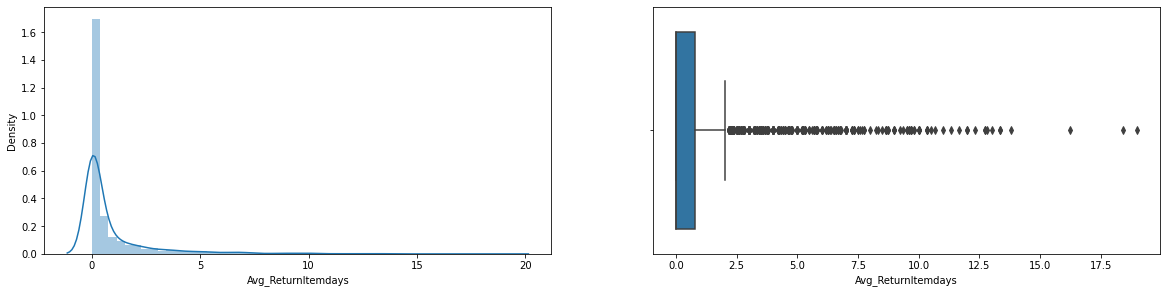

attribute_name : Renewal_PreviousPaidPercentageOfRTR
Description of attribute : 

count    3122.000000
mean        0.735058
std         0.252661
min         0.000000
25%         0.550000
50%         0.670000
75%         0.950000
max         2.150000
Name: Renewal_PreviousPaidPercentageOfRTR, dtype: float64 

Value counts of attribute : 

1.00    371
0.53    121
0.52    120
0.51    104
0.60     99
       ... 
1.56      1
1.27      1
1.58      1
0.02      1
1.95      1
Name: Renewal_PreviousPaidPercentageOfRTR, Length: 164, dtype: int64 

Unique number of attribute : 

[0.3  0.61 0.55 0.36 0.54 0.53 0.96 0.7  0.6  0.57 0.84 0.51 0.76 0.46
 0.66 0.74 0.56 1.07 1.18 0.5  0.12 1.   0.63 1.52 0.47 0.64 0.72 0.18
 0.71 1.12  nan 0.62 0.69 1.01 0.95 1.11 1.28 0.37 0.67 0.59 1.13 0.88
 0.77 0.8  0.75 0.02 0.65 0.22 0.97 1.02 0.73 0.94 1.37 0.52 0.58 1.33
 0.92 0.42 1.16 0.21 0.79 0.86 0.83 0.85 0.68 0.16 1.14 0.78 0.9  0.98
 0.45 0.4  0.93 1.05 0.87 0.49 1.03 0.   1.17 0.48 1.1  0.81 1.2  0.35


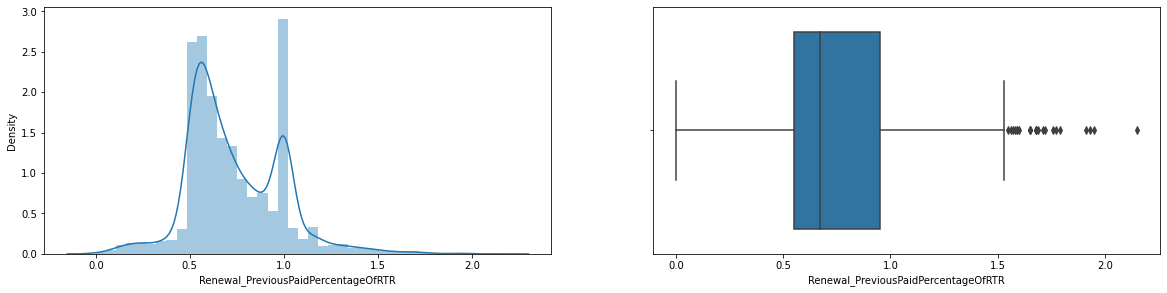

attribute_name : BankStatement_MA_OverdraftDays
Description of attribute : 

count    3116.000000
mean        1.249989
std         2.375359
min         0.000000
25%         0.000000
50%         0.100000
75%         1.500000
max        22.000000
Name: BankStatement_MA_OverdraftDays, dtype: float64 

Value counts of attribute : 

0.00     1558
0.25      118
1.00      110
0.20       88
0.50       85
         ... 
11.60       1
11.50       1
9.40        1
14.00       1
16.00       1
Name: BankStatement_MA_OverdraftDays, Length: 128, dtype: int64 

Unique number of attribute : 

[ 1.        1.5            nan  3.        0.        0.25      4.
  5.        3.5       0.5       2.        0.666666 10.666666  0.333333
  1.75      2.333333  8.666666  2.5       4.333333  8.25      1.333333
  5.75      1.666666  4.5       9.75      0.4       0.75      9.
  2.75      0.8       7.        1.6       0.6       5.4       0.2
  1.4       1.25      2.4       6.25      4.25      3.333333  2.6
  1.8       6. 

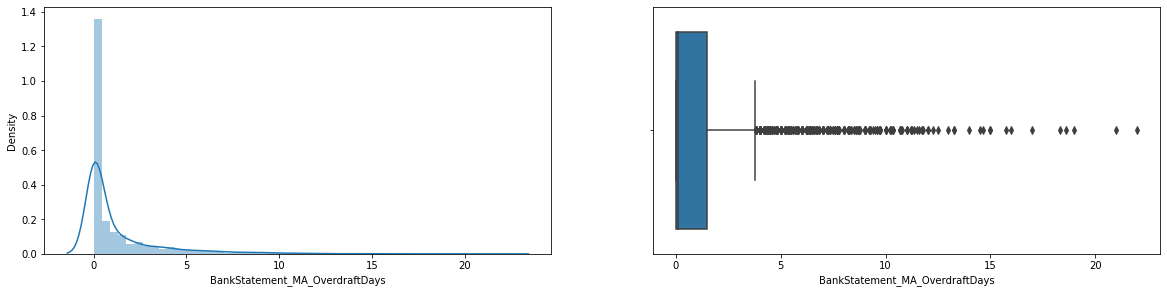

attribute_name : AvgMonthlydeposits
Description of attribute : 

count    3.116000e+03
mean     7.382959e+04
std      2.638700e+05
min      1.002550e+02
25%      1.651866e+04
50%      2.806152e+04
75%      5.808345e+04
max      9.840592e+06
Name: AvgMonthlydeposits, dtype: float64 

Value counts of attribute : 

800740.832000    2
69271.666666     2
274752.425000    2
17785.935000     2
151183.067500    2
                ..
37348.047500     1
31594.682500     1
128858.920000    1
22788.607500     1
105452.144000    1
Name: AvgMonthlydeposits, Length: 3084, dtype: int64 

Unique number of attribute : 

[ 62212.11    19871.6775         nan ...  27601.37    83835.
 105452.144 ] 

Missing values in attribute : 

18 

Missing values in attribute_% : 

0.574345883854499 



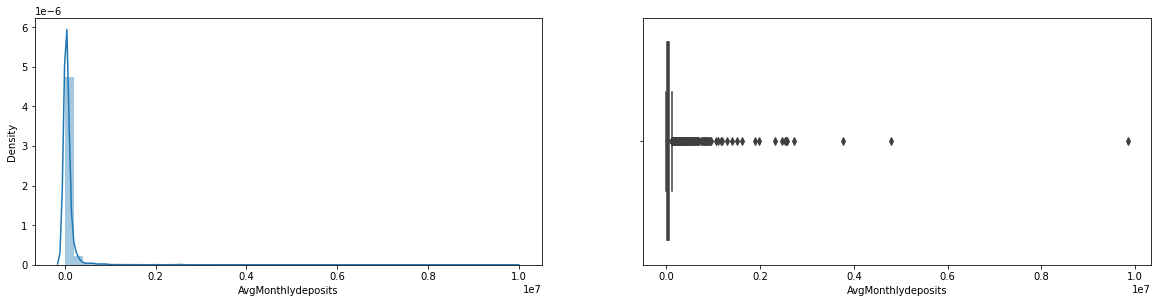

attribute_name : BankStatement_MA_NumReturnItems
Description of attribute : 

count    3116.000000
mean        1.020170
std         3.034446
min         0.000000
25%         0.000000
50%         0.000000
75%         0.750000
max        98.333333
Name: BankStatement_MA_NumReturnItems, dtype: float64 

Value counts of attribute : 

0.00     1798
0.25      123
0.20      115
1.00      103
0.50       90
         ... 
11.60       1
10.20       1
9.80        1
15.25       1
16.75       1
Name: BankStatement_MA_NumReturnItems, Length: 132, dtype: int64 

Unique number of attribute : 

[ 0.        2.             nan  2.333333  6.        2.25      1.666666
  1.        0.75      2.666666  0.333333  0.25      3.666666  3.
  4.666666  1.25      5.666666  1.5       5.5      12.333333  6.5
  4.5       6.75      2.5      17.        0.5       3.2       0.666666
  4.        0.8       3.25      1.75      3.8       0.6       1.6
 11.5       0.2       1.2      10.        1.333333  7.333333  5.75
  5.6     

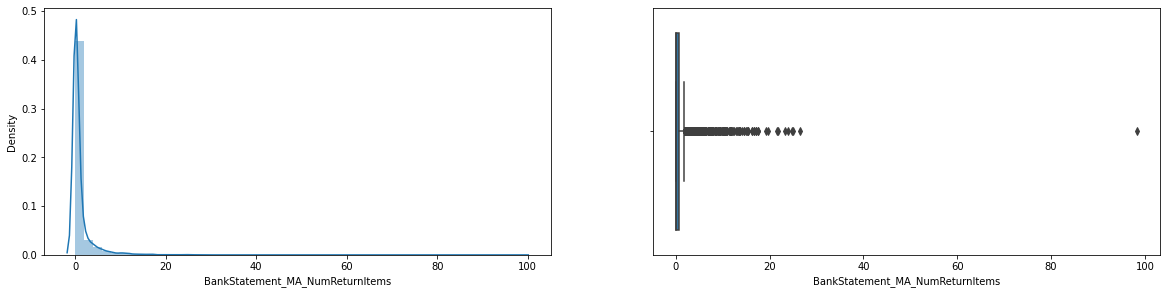

attribute_name : AvgDailybalance
Description of attribute : 

count    3.116000e+03
mean     1.174766e+04
std      5.677832e+04
min     -1.447103e+05
25%      1.697072e+03
50%      3.557125e+03
75%      8.309392e+03
max      2.450719e+06
Name: AvgDailybalance, dtype: float64 

Value counts of attribute : 

41218.4800    2
765.2150      2
2245.5550     2
20049.5700    2
2463.1875     2
             ..
8828.4500     1
3741.3300     1
31610.8750    1
26893.1000    1
2758.7540     1
Name: AvgDailybalance, Length: 3082, dtype: int64 

Unique number of attribute : 

[12452.49    3893.41          nan ...  2344.816   5869.1975  2758.754 ] 

Missing values in attribute : 

18 

Missing values in attribute_% : 

0.574345883854499 



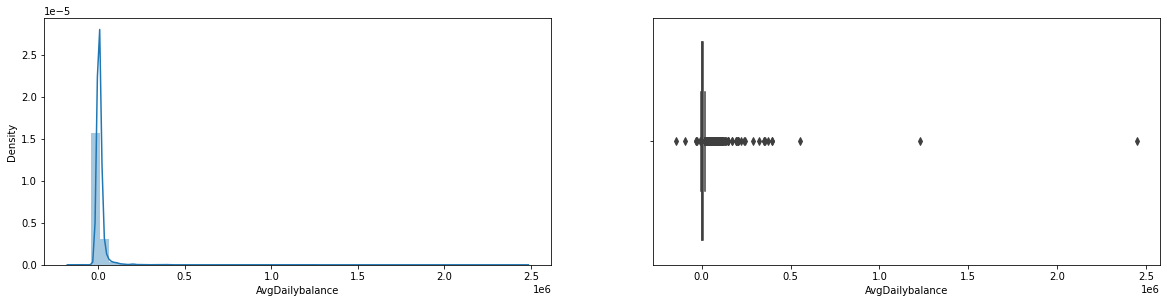

attribute_name : Credit_Score__c
Description of attribute : 

count    3122.000000
mean      549.540359
std       153.810362
min         0.000000
25%       532.000000
50%       578.000000
75%       622.000000
max       815.000000
Name: Credit_Score__c, dtype: float64 

Value counts of attribute : 

0.0      164
595.0     32
1.0       30
550.0     30
578.0     28
        ... 
742.0      1
698.0      1
748.0      1
697.0      1
767.0      1
Name: Credit_Score__c, Length: 319, dtype: int64 

Unique number of attribute : 

[572. 533. 537.   0. 524. 636. 647. 615. 528. 619. 531. 467. 614. 522.
 610. 640. 671. 539. 526. 509. 543. 558. 483. 699. 620. 686. 565. 658.
 545. 484. 546. 541. 504. 586. 457. 621. 493. 659. 673. 563. 713. 527.
 623. 739. 485. 684. 611. 465. 535. 600. 552. 668. 500. 595. 476. 525.
 518. 463. 491. 440. 576. 508. 629. 515. 523. 464. 630. 654. 607. 746.
 538. 438. 554. 472. 570. 639. 644. 646. 613. 653. 498. 688. 652. 497.
 612. 516. 582. 556. 481. 721. 557. 540. 506. 542

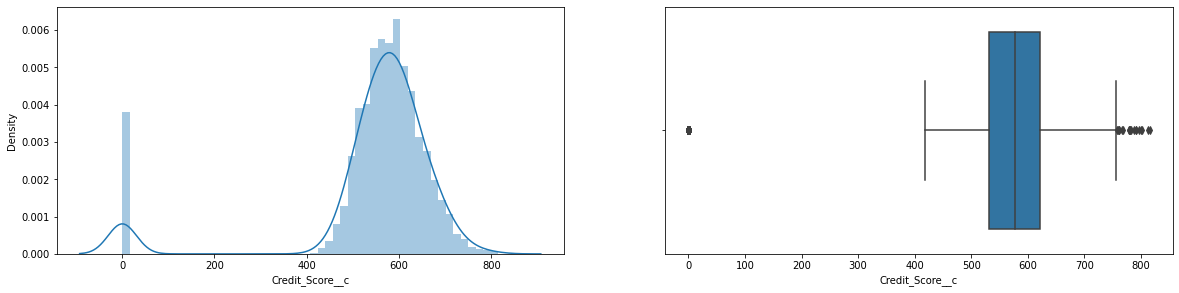

attribute_name : Renewal_PreviousPace
Description of attribute : 

count    3122.000000
mean       98.415548
std         6.317369
min        30.000000
25%       100.000000
50%       100.000000
75%       100.000000
max       100.000000
Name: Renewal_PreviousPace, dtype: float64 

Value counts of attribute : 

100.00    2806
88.00        4
96.01        3
77.27        3
90.24        2
          ... 
75.85        1
60.96        1
36.65        1
63.16        1
82.85        1
Name: Renewal_PreviousPace, Length: 289, dtype: int64 

Unique number of attribute : 

[100.    79.55  92.31    nan  97.22  90.24  97.46  77.85  90.82  66.62
  92.69  88.46  94.98  93.77  66.67  69.23  79.71  87.93  97.52  96.01
  97.3   80.77  97.92  91.67  90.    93.28  94.12  84.11  84.41  87.36
  90.15  99.38  91.53  93.72  97.7   64.04  84.14  83.33  77.27  91.3
  74.9   81.18  84.17  93.62  77.78  97.56  63.18  78.13  85.58  83.04
  82.45  91.27  83.72  77.12  90.96  96.18  94.09  98.65  83.93  64.93
  78.    80.1

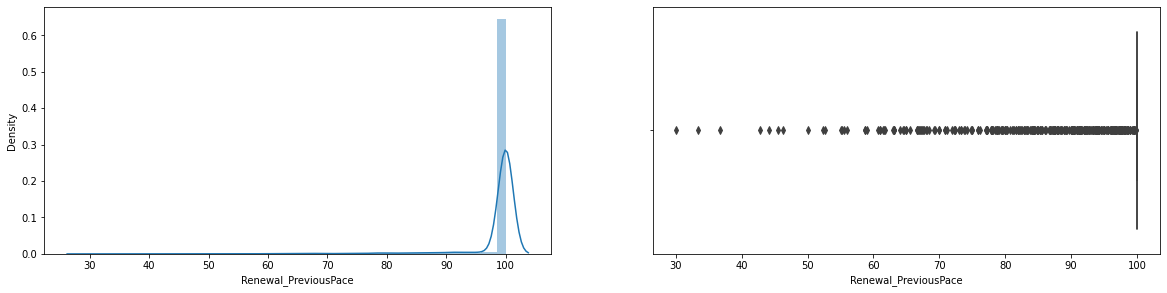

attribute_name : drop_percent
Description of attribute : 

count    3113.000000
mean       33.116832
std       239.385155
min      -384.435096
25%       -27.390620
50%        -1.183065
75%        34.669913
max      5685.199004
Name: drop_percent, dtype: float64 

Value counts of attribute : 

 79.686664     10
 174.035510    10
-30.766507     10
 9.233354       9
 42.300895      9
               ..
-4.440980       1
 0.516137       1
 54.158600      1
-5.563141       1
-0.115804       1
Name: drop_percent, Length: 1636, dtype: int64 

Unique number of attribute : 

[ 1.52277830e+01 -3.84435096e+02 -9.97778900e+00 ... -3.35425230e+01
  4.29667800e+01 -1.15804000e-01] 

Missing values in attribute : 

21 

Missing values in attribute_% : 

0.6700701978302489 



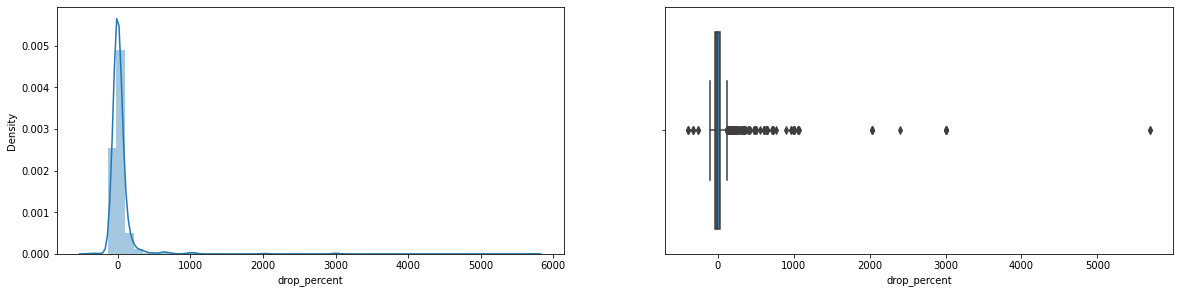

attribute_name : TwoMonthAvg_AdjustedMonthlyDeposits
Description of attribute : 

count    3.115000e+03
mean     7.819674e+04
std      2.048409e+05
min     -6.656000e+03
25%      1.612802e+04
50%      2.887052e+04
75%      6.159560e+04
max      3.545544e+06
Name: TwoMonthAvg_AdjustedMonthlyDeposits, dtype: float64 

Value counts of attribute : 

36775.690     10
28734.670     10
16128.025     10
36759.695      9
23625.000      9
              ..
21496.220      1
218171.000     1
16923.530      1
29165.315      1
119744.685     1
Name: TwoMonthAvg_AdjustedMonthlyDeposits, Length: 1638, dtype: int64 

Unique number of attribute : 

[ 94586.515  -6656.     11706.    ...  38990.925   5916.245 119744.685] 

Missing values in attribute : 

19 

Missing values in attribute_% : 

0.6062539885130823 



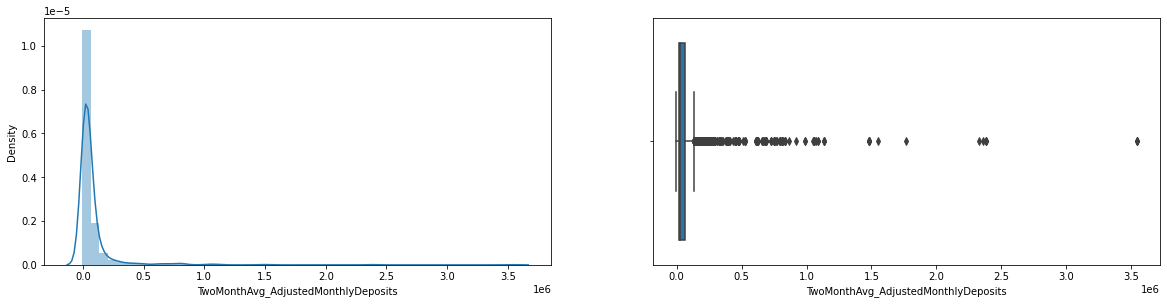

attribute_name : AdjustedMonthlyDeposits
Description of attribute : 

count    3.127000e+03
mean     7.961172e+04
std      2.384843e+05
min     -7.076483e+05
25%      1.521044e+04
50%      2.943497e+04
75%      6.009328e+04
max      4.148920e+06
Name: AdjustedMonthlyDeposits, dtype: float64 

Value counts of attribute : 

0.00         13
100778.45    10
51632.37     10
11166.00     10
52309.37      9
             ..
21607.17      1
336329.36     1
15982.05      1
38836.59      1
119606.02     1
Name: AdjustedMonthlyDeposits, Length: 1638, dtype: int64 

Unique number of attribute : 

[108989.94  18932.    10538.   ...  25912.39   8458.26 119606.02] 

Missing values in attribute : 

7 

Missing values in attribute_% : 

0.22335673261008296 



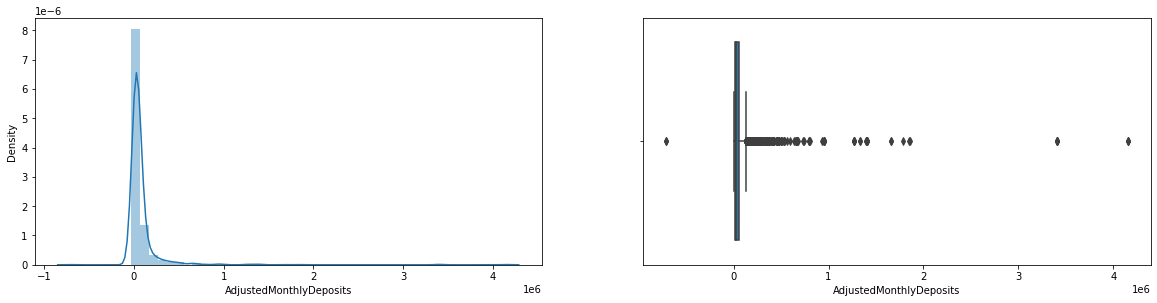

In [ ]:
missing_attributes = ['LatestMonth_ReturnItemDays', 
                      'PctChangeInReveune', 
                      'Renewal_PreviousAvgMonthRevenue',
                      'Renewal_PreviousAvgDailyBalance',
                      'PctAvgDailybalance2AvgMonthlyDeposits',
                      'Avg_ReturnItemdays',
                      'Renewal_PreviousPaidPercentageOfRTR', 
                      'BankStatement_MA_OverdraftDays',           
                      'AvgMonthlydeposits',        
                      'BankStatement_MA_NumReturnItems',          
                      'AvgDailybalance',                                            
                      'Credit_Score__c',                          
                      'Renewal_PreviousPace',
                      'drop_percent',
                      'TwoMonthAvg_AdjustedMonthlyDeposits',
                      'AdjustedMonthlyDeposits']    

for col in missing_attributes:
  print('\033[1m'+'attribute_name :', col+'\033[0m')
  attribute_info(data[col])

In [ ]:
print('Renewal_PreviousPaidPercentageOfRTR :                      ', data['Renewal_PreviousPaidPercentageOfRTR'].median())
print('BankStatement_MA_OverdraftDays :                           ', data['BankStatement_MA_OverdraftDays'].median())
print('AvgMonthlydeposits :                                       ', data['AvgMonthlydeposits'].median())
print('BankStatement_MA_NumReturnItems :                          ', data['BankStatement_MA_NumReturnItems'].median())
print('AvgDailybalance :                                          ', data['AvgDailybalance'].median())
print('LatestMonth_ReturnItemDays :                               ', data['LatestMonth_ReturnItemDays'].median())
print('PctChangeInReveune :                                       ', data['PctChangeInReveune'].median())
print('PctAvgDailybalance2AvgMonthlyDeposits :                    ', data['PctAvgDailybalance2AvgMonthlyDeposits'].median())
print('Avg_ReturnItemdays :                                       ', data['Avg_ReturnItemdays'].median())
print('Renewal_PreviousAvgMonthRevenue :                          ', data['Renewal_PreviousAvgMonthRevenue'].median())
print('Renewal_PreviousAvgDailyBalance :                          ', data['Renewal_PreviousAvgDailyBalance'].median())
print('Renewal_PreviousPace :                                     ', data['Renewal_PreviousPace'].median())
print('drop_percent :                                             ', data['drop_percent'].median())
print('TwoMonthAvg_AdjustedMonthlyDeposits :                      ', data['TwoMonthAvg_AdjustedMonthlyDeposits'].median())
print('AdjustedMonthlyDeposits :                                  ', data['AdjustedMonthlyDeposits'].median())


Renewal_PreviousPaidPercentageOfRTR :                       0.67
BankStatement_MA_OverdraftDays :                            0.1
AvgMonthlydeposits :                                        28061.5156665
BankStatement_MA_NumReturnItems :                           0.0
AvgDailybalance :                                           3557.125
LatestMonth_ReturnItemDays :                                0.0
PctChangeInReveune :                                        0.051044570169082995
PctAvgDailybalance2AvgMonthlyDeposits :                     0.1223568549836635
Avg_ReturnItemdays :                                        0.0
Renewal_PreviousAvgMonthRevenue :                           25553.69
Renewal_PreviousAvgDailyBalance :                           3535.52
Renewal_PreviousPace :                                      100.0
drop_percent :                                              -1.183065
TwoMonthAvg_AdjustedMonthlyDeposits :                       28870.52
AdjustedMonthlyDeposits :         

In [ ]:
credit_mean = data[(data['Credit_Score__c'] != 0) & (data['Credit_Score__c'] != 1)]['Credit_Score__c'].mean()
credit_mean

585.9409153005464

In [ ]:
data['Renewal_PreviousPaidPercentageOfRTR'].fillna(data['Renewal_PreviousPaidPercentageOfRTR'].median(), inplace = True)
data['BankStatement_MA_OverdraftDays'].fillna(data['BankStatement_MA_OverdraftDays'].median(), inplace = True)
data['AvgMonthlydeposits'].fillna(data['AvgMonthlydeposits'].median(), inplace = True)
data['BankStatement_MA_NumReturnItems'].fillna(data['BankStatement_MA_NumReturnItems'].median(), inplace = True)
data['AvgDailybalance'].fillna(data['AvgDailybalance'].median(), inplace = True)
data['LatestMonth_ReturnItemDays'].fillna(data['LatestMonth_ReturnItemDays'].median(),inplace = True)
data['PctChangeInReveune'].fillna(data['PctChangeInReveune'].median(),inplace = True)
data['PctAvgDailybalance2AvgMonthlyDeposits'].fillna(data['PctAvgDailybalance2AvgMonthlyDeposits'].median(),inplace = True)
data['Avg_ReturnItemdays'].fillna(data['Avg_ReturnItemdays'].median(),inplace = True)
data['Renewal_PreviousAvgMonthRevenue'].fillna(data['Renewal_PreviousAvgMonthRevenue'].median(),inplace = True)
data['Renewal_PreviousAvgDailyBalance'].fillna(data['Renewal_PreviousAvgDailyBalance'].median(),inplace = True)
data['Renewal_PreviousPace'].fillna(data['Renewal_PreviousPace'].median(),inplace = True)
data['drop_percent'].fillna(data['drop_percent'].median(),inplace = True)
data['TwoMonthAvg_AdjustedMonthlyDeposits'].fillna(data['TwoMonthAvg_AdjustedMonthlyDeposits'].median(),inplace = True)
data['AdjustedMonthlyDeposits'].fillna(data['AdjustedMonthlyDeposits'].median(),inplace = True)


In [ ]:
credit_mean = data[(data['Credit_Score__c'] != 0) & (data['Credit_Score__c'] != 1)]['Credit_Score__c'].mean()
credit_mean

585.9409153005464

In [ ]:
data['Credit_Score__c'].fillna(credit_mean,inplace = True)

Description of attribute : 

count    3134.000000
mean      549.679735
std       153.531983
min         0.000000
25%       532.000000
50%       578.000000
75%       621.750000
max       815.000000
Name: Credit_Score__c, dtype: float64 

Value counts of attribute : 

0.0      164
595.0     32
1.0       30
550.0     30
578.0     28
        ... 
748.0      1
697.0      1
438.0      1
458.0      1
767.0      1
Name: Credit_Score__c, Length: 320, dtype: int64 

Unique number of attribute : 

[572.        533.        537.          0.        524.        636.
 647.        615.        528.        619.        531.        467.
 614.        522.        610.        640.        671.        539.
 526.        509.        543.        558.        483.        699.
 620.        686.        565.        658.        545.        484.
 546.        541.        504.        586.        457.        621.
 493.        659.        673.        563.        713.        527.
 623.        739.        485.        684.     

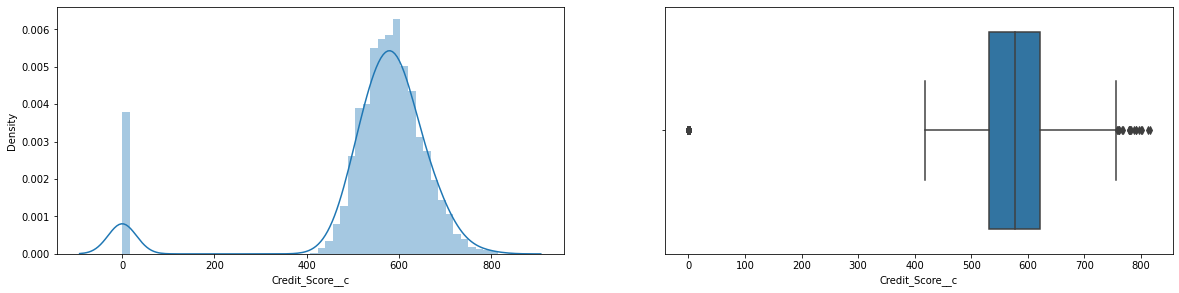

In [ ]:
attribute_info(data['Credit_Score__c'])

In [ ]:
data.isnull().sum().sort_values(ascending = False)/len(data)*100

OpportunityID                                 0.0
Renewal_PreviousPace                          0.0
Avg_ReturnItemdays                            0.0
LatestMonth_ReturnItemDays                    0.0
PctChangeInReveune                            0.0
PctAvgDailybalance2AvgMonthlyDeposits         0.0
TwoMonthAvg_AdjustedMonthlyDeposits           0.0
AdjustedMonthlyDeposits                       0.0
drop_percent                                  0.0
Is_this_Business_home_based__c_Yes            0.0
Industry_Construction                         0.0
Industry_E-Commerce                           0.0
Industry_Finance, Insurance, Real Estate      0.0
Industry_Manufacturing                        0.0
Industry_Mining                               0.0
Industry_Retail                               0.0
Industry_Services                             0.0
Industry_Transportation & Public Utilities    0.0
Industry_Wholesale                            0.0
Industry_Wholesale Trade                      0.0


In [ ]:
data.to_excel('/content/drive/MyDrive/LCF_Internal/Renewable_Model/EDA Approach-1/XGBoost Implementation/logistic_v9/v9_data.xlsx', index = False)